In [1]:
%cd ..

c:\Users\ganga\Downloads\YOLO v-8 code\yolo v-8 HPE


C:\Users\ganga\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# Import library
import cv2
import numpy as np
from PIL import Image
from src.detection_keypoint import DetectKeypoint
from src.classification_keypoint import KeypointClassification

In [4]:
detection_keypoint = DetectKeypoint()
classification_keypoint = KeypointClassification(
    r'C:\Users\ganga\Downloads\YOLO v-8 code\yolo v-8 HPE\models\pose_classification.pth'
)

In [6]:
# run
image = cv2.imread(r'C:\Users\ganga\Downloads\YOLO v-8 code\yolo v-8 HPE\datasets\YogaPoses\Goddess\00000000.jpg')
results = detection_keypoint(image)


0: 640x640 1 person, 1517.0ms
Speed: 10.0ms preprocess, 1517.0ms inference, 2546.3ms postprocess per image at shape (1, 3, 640, 640)


In [7]:
results.keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9960, 0.9864, 0.9778, 0.8701, 0.7264, 0.9975, 0.9972, 0.9913, 0.9878, 0.9848, 0.9797, 0.9990, 0.9989, 0.9945, 0.9941, 0.9261, 0.9271]])
data: tensor([[[124.0577,  84.8517,   0.9960],
         [127.3848,  80.9741,   0.9864],
         [120.6437,  81.1915,   0.9778],
         [132.8266,  83.9844,   0.8701],
         [116.3948,  84.2373,   0.7264],
         [145.8175, 103.9250,   0.9975],
         [104.6387, 102.0138,   0.9972],
         [169.3650, 103.7842,   0.9913],
         [ 83.4124, 102.8354,   0.9878],
         [172.3301,  79.1234,   0.9848],
         [ 78.9523,  81.9714,   0.9797],
         [141.8118, 154.0098,   0.9990],
         [110.6883, 152.9196,   0.9989],
         [167.8103, 160.0611,   0.9945],
         [ 84.3642, 158.6837,   0.9941],
         [176.7603, 205.4391,   0.9261],
         [ 78.2605, 201.9263,   0.9271]]])
has_visible: True
orig_shape: (240, 240)
shape: torch.Size([1, 17, 3])
xy: tenso

In [8]:
results_keypoint = detection_keypoint.get_xy_keypoint(results)
input_classification = results_keypoint[10:]
results_classification = classification_keypoint(input_classification)
results_classification

'Goddess'

Keypoint classification : Goddess


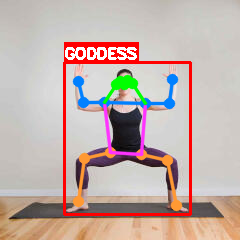

In [9]:
## Visualise Keypoint
height, width = image.shape[:2]

image_draw = results.plot(boxes=False)

x_min, y_min, x_max, y_max = results.boxes.xyxy[0].numpy()
image_draw = cv2.rectangle(
                image_draw, 
                (int(x_min), int(y_min)),(int(x_max), int(y_max)), 
                (0,0,255), 2
            )
(w, h), _ = cv2.getTextSize(
        results_classification.upper(), 
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2
    )
image_draw = cv2.rectangle(
                image_draw, 
                (int(x_min), int(y_min)-20),(int(x_min)+w, int(y_min)), 
                (0,0,255), -1
            )
cv2.putText(image_draw,
            f'{results_classification.upper()}',
            (int(x_min), int(y_min)-4),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (255, 255, 255),
            thickness=2
        )

print(f'Keypoint classification : {results_classification}')
Image.fromarray(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))

Keypoint classification : Goddess


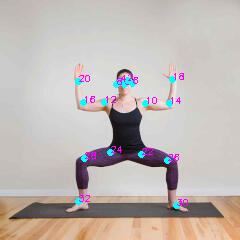

In [10]:
## Visualise Keypoint
height, width = image.shape[:2]

image_draw = image.copy()
for idx in range(0, len(results_keypoint), 2):
    x, y = results_keypoint[idx], results_keypoint[idx+1]
    if x == 0 or x == 1: continue
    if y == 0 or y == 1: continue
    x, y = int(x*width), int(y*height)
    # visualize point
    image_draw = cv2.circle(image_draw, (x,y), 2, (255,255,0), 2)
    image_draw = cv2.putText(image_draw, str(idx), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.3,  (255,0,255),1)

print(f'Keypoint classification : {results_classification}')
Image.fromarray(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))